<font color="yellow"><b><u>NOTES:</u></b></font>

<p>Just like in the previous exercise, this will act as a playground for testing and controlling the outputs of each algorithms and their running times.</p>

In [1]:
import ioh 
import numpy as np
from typing import Callable
from pathlib import Path

In [2]:
# add parent directory to path for imports
import sys
import os
import time 

# Add the path to sys.path
code_path = os.path.abspath('../final/code')
if code_path not in sys.path:
    sys.path.insert(0, code_path)

In [ ]:

from algorithms import OnePlusOneEA, RandomizedLocalSearch, DesignedGA  
from utilities.utilities import ensure_dir 
from utilities import config 

<p>In this assignment, we consider 3 graph-based problems:</p>


1. Max Coverage: Given an undirected weighted graph $G = (V, E)$ with a cost function $c: V \to \R_{\geq 0}$. We denote $N(V') = \{v_i\hspace{1mm}|\hspace{1mm}\exists e \in E: \{e\} \cap V\ \neq \empty \text{ and } \}$, the set of all nodes of $V'$ and their neighbors in $G$. Our goal is to maximize $f(x) = |N(V'(x))|$ under the constaint that $c(x) \leq B$ holds, where $B$ is a given fixed budget (fitness evaluations).
2. Max Influence: 
3. Pack While Travel: 

<p>Although we consider 3 problems, we will actually work with 11 instances of those problems! That is, according to the assignment specification, we will deal with the following instances:</p>


<ol>
<li>Max Coverage: 2100, 2101, 2102, 2103</li>
<li>Max Influence: 2200, 2201, 2202, 2203</li>
<li>PackWhileTravel: 2300, 2301, 2302</li>

</ol>

### <b><u>Exercise 1:</u></b>

<p>Let us begin with the first exercise, which requires us to run RandomSearch, RLS, (1+1)-EA and our DesignedGA from Assignment 2 on the above (11) instances. This is doable ... after completing all 30 runs, where each run has a budget of 10K fitness evaluations, we arrive at the following, current, stats:</p>



- Random Search ---> 244.76 seconds 
- (1+1)-EA ---> 354.18 seconds 
- RLS ---> 219.28 seconds
- Designed GA ---> 5603.92 seconds


### Important Note About Timing Measurements

**The times above were measured using `time.process_time()` which only captures CPU time, not actual elapsed time.**

This means:
- Times can vary significantly between runs due to system load
- Doesn't account for I/O operations or waiting time
- Not reliable for comparing performance across different environments (main script vs notebook)

**For accurate comparisons, we've now switched to `time.perf_counter()` which measures actual wall-clock time.**

In [10]:
First_run_times = [244.76, 3554.18, 219.28, 5603.92]
# convert to minutes 
First_run_times = [t / 60 for t in First_run_times]
algorithms = [ "Random Search", "(1+1)-EA", "RLS", "Designed GA"]
print(f"Algorithm\t\t\t\tTime (minutes)")
for alg, t in zip(algorithms, First_run_times):
    print(f"{alg:<20}\t\t{t:>15.2f}")

Algorithm				Time (minutes)
Random Search       		           4.08
(1+1)-EA            		          59.24
RLS                 		           3.65
Designed GA         		          93.40


In [11]:
# convert to hours and minutes 
total_time = sum(First_run_times) / 60
hours = int(total_time)
minutes = int((total_time - hours) * 60)
print(f"Total time for all algorithms: {hours} hours and {minutes} minutes")

Total time for all algorithms: 2 hours and 40 minutes


In [14]:
elapsed_times = []
# Get the directory where this notebook is located
notebook_dir = Path.cwd() if 'ipykernel' in sys.modules else Path(__file__).parent
out_base = ensure_dir(notebook_dir / "data")
out_base

PosixPath('/home/sething2002/2025_S2/TA_Assignment_3/ideas/data')

In [4]:
Algorithms = config.ALGORITHMS
Dimension = config.DIMENSION
Budget = config.BUDGET
Repetitions = config.REPETITIONS
Instances = config.PROBLEM_IDS

### Some changes I made to get the running times down ...

### Random Search


In [21]:
random_search = Algorithms[0]

In [ ]:
print(f"=========== Running experiments for algorithm: {random_search.name} ========== ")
# start time - use perf_counter for wall-clock time
start_time = time.perf_counter()
# create a new experiment for the current algorithm 
experiment = ioh.Experiment(
    algorithm=random_search,
    algorithm_name=random_search.name,
    algorithm_info=random_search.algorithm_info,
    fids = config.PROBLEM_IDS,
    iids = [1], 
    dims=[config.DIMENSION],
    reps=config.REPETITIONS,
    problem_class=config.PROBLEMS_TYPE,  # Use the configured problem class # type: ignore
    old_logger=False,  # type: ignore
    output_directory=str(out_base),
    folder_name=f"ioh-data-{random_search.name}",
    zip_output=True, 
)

# run the experiment
experiment.run()

end_time = time.perf_counter()
elapsed_time = end_time - start_time
elapsed_times.append(elapsed_time)
# convert to minutes
elapsed_time_minutes = elapsed_time / 60
print(f"Time taken for {random_search.name}: {elapsed_time:.2f} seconds ({elapsed_time_minutes:.2f} minutes)")

=========== Running experiments for algorithm: Random Search ========== 
Time taken for Random Search: 4.79 minutes
Time taken for Random Search: 4.79 minutes


### RLS

In [22]:
rls = Algorithms[2]

In [ ]:
print(f"=========== Running experiments for algorithm: {rls.name} ========== ")
# start time - use perf_counter for wall-clock time
start_time = time.perf_counter()
# create a new experiment for the current algorithm 
experiment = ioh.Experiment(
    algorithm=rls,
    algorithm_name=rls.name,
    algorithm_info=rls.algorithm_info,
    fids = config.PROBLEM_IDS,
    iids = [1], 
    dims=[config.DIMENSION],
    reps=config.REPETITIONS,
    problem_class=config.PROBLEMS_TYPE,  # Use the configured problem class # type: ignore
    old_logger=False,  # type: ignore
    output_directory=str(out_base),
    folder_name=f"ioh-data-{rls.name}",
    zip_output=True, 
)

# run the experiment
experiment.run()

end_time = time.perf_counter()
elapsed_time = end_time - start_time
elapsed_times.append(elapsed_time)
# convert to minutes
elapsed_time_minutes = elapsed_time / 60
print(f"Time taken for {rls.name}: {elapsed_time:.2f} seconds ({elapsed_time_minutes:.2f} minutes)")

=========== Running experiments for algorithm: Random Search ========== 
Time taken for Randomized Local Search: 4.16 minutes
Time taken for Randomized Local Search: 4.16 minutes


In [29]:
print(f"=========== Running experiments for algorithm: {rls.name} ========== ")
# start time - use perf_counter for wall-clock time
start_time = time.perf_counter()
# create a new experiment for the current algorithm 
experiment = ioh.Experiment(
    algorithm=rls,
    algorithm_name=rls.name,
    algorithm_info=rls.algorithm_info,
    fids = config.PROBLEM_IDS,
    iids = [1], 
    dims=[config.DIMENSION],
    reps=config.REPETITIONS,
    problem_class=config.PROBLEMS_TYPE,  # Use the configured problem class # type: ignore
    old_logger=False,  # type: ignore
    output_directory=str(out_base),
    folder_name=f"ioh-data-{rls.name}",
    zip_output=True, 
)

# run the experiment
experiment.run()

end_time = time.perf_counter()
elapsed_time = end_time - start_time
elapsed_times.append(elapsed_time)
# convert to minutes
elapsed_time_minutes = elapsed_time / 60
print(f"Time taken for {rls.name}: {elapsed_time:.2f} seconds ({elapsed_time_minutes:.2f} minutes)")

=========== Running experiments for algorithm: Randomized Local Search ========== 
Time taken for Randomized Local Search: 245.71 seconds (4.10 minutes)
Time taken for Randomized Local Search: 245.71 seconds (4.10 minutes)


### (1+1)-EA

In [24]:
OnePlusOneEA = Algorithms[1]

In [ ]:
print(f"=========== Running experiments for algorithm: {OnePlusOneEA.name} ========== ")
# start time - use perf_counter for wall-clock time
start_time = time.perf_counter()
# create a new experiment for the current algorithm 
experiment = ioh.Experiment(
    algorithm=OnePlusOneEA,
    algorithm_name=OnePlusOneEA.name,
    algorithm_info=OnePlusOneEA.algorithm_info,
    fids = config.PROBLEM_IDS,
    iids = [1], 
    dims=[config.DIMENSION],
    reps=config.REPETITIONS,
    problem_class=config.PROBLEMS_TYPE,  # Use the configured problem class # type: ignore
    old_logger=False,  # type: ignore
    output_directory=str(out_base),
    folder_name=f"ioh-data-{OnePlusOneEA.name}",
    zip_output=True, 
)

# run the experiment
experiment.run()

end_time = time.perf_counter()
elapsed_time = end_time - start_time
elapsed_times.append(elapsed_time)
# convert to minutes
elapsed_time_minutes = elapsed_time / 60
print(f"Time taken for {OnePlusOneEA.name}: {elapsed_time:.2f} seconds ({elapsed_time_minutes:.2f} minutes)")

=========== Running experiments for algorithm: (1+1)_EA ========== 
Time taken for (1+1)_EA: 6.54 minutes
Time taken for (1+1)_EA: 6.54 minutes


### Designed GA

In [30]:
DesignedGA = Algorithms[3]

In [31]:
print(f"=========== Running experiments for algorithm: {DesignedGA.name} ========== ")
# start time 
start_time = time.process_time()
# create a new experiment for the current algorithm 
experiment = ioh.Experiment(
    algorithm=DesignedGA,
    algorithm_name=DesignedGA.name,
    algorithm_info=DesignedGA.algorithm_info,
    fids = config.PROBLEM_IDS,
    iids = [1], 
    dims=[config.DIMENSION],
    reps=config.REPETITIONS,
    problem_class=config.PROBLEMS_TYPE,  # Use the configured problem class # type: ignore
    old_logger=False,  # type: ignore
    output_directory=str(out_base),
    folder_name=f"ioh-data-{DesignedGA.name}",
    zip_output=True, 
)

# run the experiment
experiment.run()

end_time = time.process_time()
elapsed_time = end_time - start_time
elapsed_times.append(elapsed_time)
# convert to minutes 
elapsed_time = elapsed_time / 60    
print(f"Time taken for {DesignedGA.name}: {elapsed_time:.2f} minutes")
None 

=========== Running experiments for algorithm: Designed Genetic Algorithm with Binomial Sampling ========== 


KeyboardInterrupt: 

### Experimenting with multi-objective algorithms...


<p>I think that it is helpful to have a look at some preliminary ideas displayed in NSGA and an improved variant of it called NSGA-II. It's a multi-objective optimization algorithm -- it solves multi-objective optimization problems (problems with multiple objective functions, and usually in conflict with one another) in general. So it's quite <b>general</b> ... (like any EAs and GAs introduced thus far). The main motivation for even introducing NSGA (and NSGA II) is to improve upon traditional methods such as <i>weighted sum</i>, <i>distance functions</i>, and <i>max-min</i>, where we need to run any one of them <b>several times</b> to get a diverse set of solutions with different trade-offs. NSGA (and NSGA II) requires us to run it <b>once</b> and that set will come out nicely ...</p>

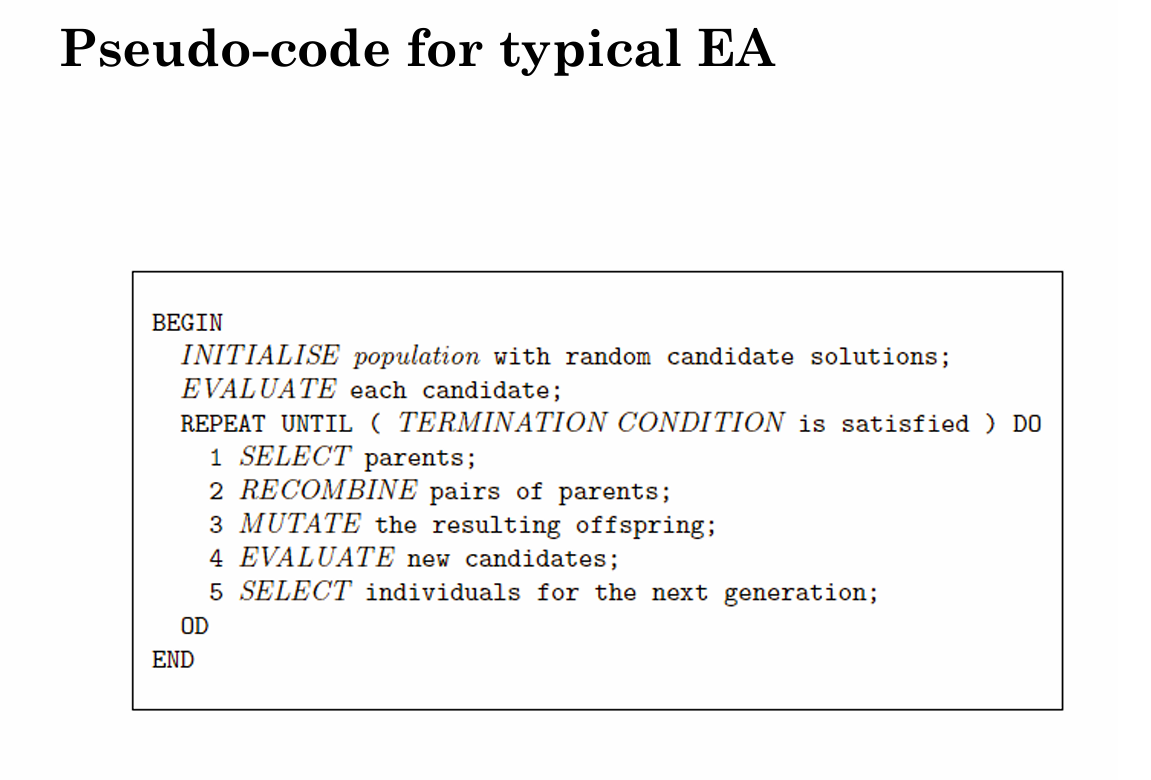

#### We shall apply NSGA (and later NSGA II) on the graph problems listed above.

In [5]:
DIMENSION = 40

In [6]:
# grabbing all instances of Max Coverage Problem from ioh data
MC_1 = ioh.get_problem(fid=2100, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
MC_2 = ioh.get_problem(fid=2101, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
MC_3 = ioh.get_problem(fid=2102, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
MC_4 = ioh.get_problem(fid=2103, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)

In [7]:
# grabbing all instances of Max Influence Problem from ioh data
MI_1 = ioh.get_problem(fid=2200, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
MI_2 = ioh.get_problem(fid=2201, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
MI_3 = ioh.get_problem(fid=2202, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
MI_4 = ioh.get_problem(fid=2203, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)


In [8]:
# grabbing all instances of Pack While Traveling Problem from ioh data
PWT_1 = ioh.get_problem(fid=2300, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
PWT_2 = ioh.get_problem(fid=2301, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
PWT_3 = ioh.get_problem(fid=2302, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)
PWT_4 = ioh.get_problem(fid=2303, instance=1, dimension=DIMENSION, problem_class=ioh.ProblemClass.GRAPH)


#### Some standard utility methods in a typical GA

In [16]:
def initialize_population(pop_size: int, genome_length: int) -> np.ndarray:
    """
        Initializes a population of individuals, uniformly at random. Each individual is represented as a binary array of length `genome_length`.
        The population is represented as a 2D numpy array of shape (pop_size, genome_length).
    """
    return np.random.randint(2, size=(pop_size, genome_length))

def evaluate_individual_multiobjective(individual: np.ndarray, problem_instance_eval_func: Callable[[np.ndarray], float]) -> tuple:
    """
        Given an individual x, evaluates its fitness using the provided multi-objective fitness function 
        and returns a pair (objective1_func(x), objective2_func(x)).
    """

    # coverage score (objective1_func) -- to be maximized
    coverage_score = problem_instance_eval_func(individual)

    # number of selected nodes (objective2_func) -- to be minimized
    num_selected_nodes = np.sum(individual)
    return (coverage_score, num_selected_nodes)


def evaluate_population(population: np.ndarray, problem_instance_eval_func: ioh.problem.GraphProblem) -> np.ndarray:
    """
        Evaluates a population of individuals using the provided single-objective fitness function from the problem instance.
        Returns an array of pairs, where for each individual x, there is a pair corresponding to it as follow (problem_instance_eval_func(x), |x|_1).
        where |x|_1 is the (absolute) sum of the elements in x.
    """
    return np.array([evaluate_individual_multiobjective(ind, problem_instance_eval_func) for ind in population])





#### The core procedure of NSGA

In [17]:
# Recall that an individual A is said to dominate another individual B if A is no worse than B in all objectives
# and A is strictly better than B in at least one objective.
def dominates(ind1_fitness: tuple[float, int], ind2_fitness: tuple[float, int]) -> bool:
    """
        Given ind1_fitness and ind2_fitness, which are tuples (a pair of numbers) 
        representing the fitness values of two individuals,
        this function determines if ind1 dominates ind2 by comparing their fitnesses.

        IMPORTANT: Here, we assume that the first objective is to be maximized (e.g., coverage score),
        and the second objective is to be minimized (e.g., number of selected nodes).
    """
    # condition 1: ind1 is no worse than ind2 in all objectives
    cond1 = ind1_fitness[0] >= ind2_fitness[0] and ind1_fitness[1] <= ind2_fitness[1]
    # condition 2: ind1 is strictly better than ind2 in at least one objective
    cond2 = ind1_fitness[0] > ind2_fitness[0] or ind1_fitness[1] < ind2_fitness[1]
    return cond1 and cond2  

In [34]:
def non_dominated_sort(Population_fitness_vals: np.ndarray[tuple]) -> list:
    # setup
    num_solutions = Population_fitness_vals.shape[0]
    # creates a set of indices for all solutions that have not been assigned a front yet
    unassigned_solutions = set(range(num_solutions)) # 0, 1, ..., num_solutions - 1
    fronts = []  # list to hold the different fronts (the maximum number of fronts is num_solutions -- each solution in its own front)


    # main loop 
    while unassigned_solutions: # as long as there are solutions not yet assigned to a front
        current_front = set()

        # go through all unassigned solutions and check if they are dominated by any other unassigned solution
        for p in unassigned_solutions:
            is_dominated = False # assume p is non-dominated until we find a solution that dominates it
            for q in unassigned_solutions:
                if p != q and dominates(Population_fitness_vals[q], Population_fitness_vals[p]): # if q dominates p
                    is_dominated = True # then p is dominated (by q)
                    break
            if not is_dominated: # if p is non-dominated among unassigned solutions, add it to the current front
                current_front.add(p)

        # if the current front is not empty, add it to the list of fronts
        if current_front:
            fronts.append(current_front)
            # remove the individuals in the current front from the set of unassigned solutions
            unassigned_solutions -= current_front
            # continue to the next front with the remaining (smaller) unassigned solutions
        # if the current front is empty, break the loop (cannot happen, can be proven in terms of dominance relation by contradiction)

    return fronts

In [35]:
def calculate_shared_fitness(pareto_fronts: list, population_fitness_values: np.ndarray, sigma_share: float, current_population: np.ndarray) -> np.ndarray:
    """
        Input: 
        pareto fronts: list of fronts of indices from non_dominated_sort()
        fitness values:  list of pairs of fitness values for each individual in the population
        sigma_share: the niche radius for calculating shared fitness
        current population:  the current population of individuals
        
        
        Description: Calculates the shared fitness for each individual in the population
        based on their proximity to other individuals in the same front.
    """
    num_individuals = current_population.shape[0]
    shared_fitness = np.zeros(num_individuals)
    dummy_fitness = np.zeros(num_individuals)

    # Assigns dummy fitness based on front levels (lower front level -> higher dummy fitness)
    current_fitness_score = num_individuals
    for front in pareto_fronts:
        for ind in front:
            dummy_fitness[ind] = current_fitness_score
        current_fitness_score -= len(front) # decrease fitness score for next front


    # Calculates niche count and final shared fitness for each individual
    for i in range(num_individuals):
        niche_count = 1.0 # starting with 1 to include the individual itself
        for j in range(num_individuals):
            if i != j:
                # calculates hamming distance between individuals i and j
                distance = np.sum(current_population[i] != current_population[j])
                if distance < sigma_share:
                    niche_count += 1 - (distance / sigma_share)
        
        # divide dummy fitness by niche count to get shared fitness
        shared_fitness[i] = dummy_fitness[i] / niche_count

    return shared_fitness
    

In [36]:
def one_point_crossover(parent1: np.ndarray, parent2: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
        Performs one-point crossover between two parents to produce two offspring.
    """
    genome_length = parent1.shape[0]
    crossover_point = np.random.randint(1, genome_length - 1)  # choose a crossover point
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return offspring1, offspring2


def bit_flip_mutation(individual: np.ndarray, mutation_rate: float) -> np.ndarray:
    """
        Performs bit-flip mutation on an individual with a given mutation rate.
    """
    for i in range(individual.shape[0]):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # flip the bit
    return individual

In [37]:
def create_new_population(population: np.ndarray, 
                        shared_fitness: np.ndarray, 
                        pop_size: int,
                        crossover_rate: float,
                        mutation_rate: float) -> np.ndarray:
    """
    Tournament selection, crossover, and mutation to create a new population.
    """
    new_population = []
    tournament_size = 2  # Number of individuals to compete in each tournament

    while len(new_population) < pop_size:
        # Tournament selection (parent selection)
        parents = []
        for _ in range(2): # Select two parents
            tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
            tournament_scores = shared_fitness[tournament_indices]
            winner_index = tournament_indices[np.argmax(tournament_scores)]
            parents.append(population[winner_index])
        parent1, parent2 = parents[0], parents[1]

        # Crossover (single-point crossover)
        if np.random.rand() < crossover_rate:
            offspring1, offspring2 = one_point_crossover(parent1, parent2)
        else:
            offspring1, offspring2 = parent1.copy(), parent2.copy()


        # Mutation
        mutated_offspring1 = bit_flip_mutation(offspring1, mutation_rate)
        mutated_offspring2 = bit_flip_mutation(offspring2, mutation_rate)

        new_population.append(mutated_offspring1)
        new_population.append(mutated_offspring2)

    return np.array(new_population[:pop_size])


In [38]:
def NSGA(problem_instance: ioh.problem.GraphProblem, 
         budget: int, 
         population_size: int, 
         mutation_rate: float, 
         crossover_rate: float,
         sigma_share: float) -> None:
    """
    Implements the NSGA-II algorithm for multi-objective optimization.

    Parameters:
    - problem_instance: An instance of the multi-objective optimization problem. 
        Although, in this case, we only have a single-objective evaluation function, we will derive two objectives (or objective functions) from it.
    - budget: Maximum number of evaluations allowed.
    - population_size: Size of the population.
    - mutation_rate: Probability of mutation.
    - crossover_rate: Probability of crossover.
    - sigma_share: Niche radius for calculating shared fitness.
    """
    # Initialize a population, P
    current_population = initialize_population(population_size, genome_length=MC_1.meta_data.n_variables)
    generation: int = 0
    # for generation in range(num_generations):
    while problem_instance.state.evaluations < budget:
        # Evaluate fitness of P
        population_fitness_values = evaluate_population(current_population, problem_instance)

        # Perform non-dominated sorting on a set of pairs (objective1(x), objective2(x)), where x is an individual in P
        pareto_fronts = non_dominated_sort(population_fitness_values)

        # penalize crowded solutions within each front
        shared_fitness = calculate_shared_fitness(pareto_fronts, population_fitness_values, sigma_share, current_population)

        # Create a new population using selection, crossover, and mutation operators
        new_population = create_new_population(current_population, shared_fitness, population_size,crossover_rate, mutation_rate)

        # Update current population
        current_population = new_population

        print(f"Generation {generation + 1} completed.")
        generation += 1



In [ ]:
NSGA(problem_instance=MC_1, 
         budget=10000, 
         population_size=100, 
         mutation_rate=0.01, 
         crossover_rate=0.7, 
         sigma_share=5.0)

In [ ]:
print(f"=========== Running experiments for algorithm: NSGA ========== ")
# start time 
start_time = time.process_time()
# create a new experiment for the current algorithm 
experiment = ioh.Experiment(
    algorithm=NSGA,
    algorithm_name="NSGA",
    algorithm_info="Original NSGA implementation",
    fids = [2100],
    iids = [1], 
    dims=[config.DIMENSION],
    reps=config.REPETITIONS,
    problem_class=config.PROBLEMS_TYPE,  # Use the configured problem class # type: ignore
    old_logger=False,  # type: ignore
    output_directory=str(out_base),
    folder_name=f"ioh-data-NSGA",
    zip_output=True, 
)

# run the experiment
experiment.run()

end_time = time.process_time()
elapsed_time = end_time - start_time
elapsed_times.append(elapsed_time)
# convert to minutes 
elapsed_time = elapsed_time / 60    
print(f"Time taken for NSGA: {elapsed_time:.2f} minutes")